In [1]:
import numpy as np
from astropy import units as u
import astropy.coordinates as coord
import healpy as hp
import matplotlib as mpl
import matplotlib.pyplot as plt
import mysql.connector
from matplotlib import colors
from matplotlib.ticker import FuncFormatter
from astroquery.irsa_dust import IrsaDust
from astropy.table import Table
import csv

In [2]:
def QueryDB(query, port='3306', query_data=None):
    
    results = []
    
    cnx = mysql.connector.connect(user='prospecktor', password='4Pr0spi3!', host='127.0.0.1', port=port, database='Prospecktor')
    cursor = cnx.cursor()
    
    if query_data is not None:
        cursor.execute(query, query_data)
    else:
        cursor.execute(query)
    
    results = [result for result in cursor]
    
    cursor.close()
    cnx.close()
    
    return results

In [32]:
#This cell grabs Name, Distance, RA, Dec, magnitude in B band, and dust specifically Av from MySql Galaxy table.
#It only pulls dec Thacher can see
#It only pulls Galaxies (flag1 = 'G')
#THIS PARTICULAR RUN THROUGH pulls d<20Mpc

#It stores the information in a table for easy access in python
#It outputs a csv of said table named "Galaxy_Table_Thacher_Dust_cut.csv"


query = ("SELECT Name_GWGC,RA,`dec`,dist,B,J,K,flag1 from Galaxy WHERE `dec` is NOT NULL and RA is NOT NULL and Name_GWGC is NOT NULL and dist IS NOT NULL and B is NOT NULL and J is NOT NULL and K is NOT NULL and dist < 20.0 and `dec`<94 and `dec`>-26 and flag1='G'")
results = QueryDB(query,port="53306")

glade_galaxy_name = []
glade_RA = []
glade_dec__Thacher_can_see_20_deg_above_rightangle_to_40 = []
glade_dist_less20 = []
B_Mag = []
J_Mag = []
K_Mag = []
Target_Type = []
glade_Av = []

for row in results:
    
    glade_galaxy_name.append(row[0])
    glade_RA.append(row[1])
    glade_dec__Thacher_can_see_20_deg_above_rightangle_to_40.append(row[2])
    glade_dist_less20.append(row[3])
    B_Mag.append(row[4])
    J_Mag.append(row[5])
    K_Mag.append(row[6])
    Target_Type.append(row[7])
    
        
    c = coord.SkyCoord(row[1], row[2], unit=(u.hourangle, u.degree), frame="fk5")

    dust_table = IrsaDust.get_extinction_table(c)
    av = dust_table["A_SandF"][np.where(dust_table["Filter_name"] == "CTIO V")][0]
    glade_Av.append(av)
    
Name = np.array([glade_galaxy_name])
RA = np.array([glade_RA])
Dec = np.array([glade_dec__Thacher_can_see_20_deg_above_rightangle_to_40])
Dist = np.array([glade_dist_less20])
B_Mag = np.array([B_Mag])
J_Mag = np.array([J_Mag])
K_Mag = np.array([K_Mag])
Type = np.array([Target_Type])
Av = np.array([glade_Av])
    
    
for i, target in enumerate(results):
    newtarget=results[i] + (glade_Av[i],)
    results[i] = newtarget

#create table to hold and display all relevant values for each file
Galaxy_table = Table([Name,RA,Dec,Dist,B_Mag,J_Mag,K_Mag,Type,Av], 
                     names = ('Name','RA','Dec','Dist','B_Mag','J_mag','K_Mag','Type','Av'))

res = results
csvfile = "Galaxy_Table_Thacher_Dust_cut_less_20Mpc.csv"
#Assuming res is a list of lists
with open(csvfile, "w") as output:
    #fieldnames = ['Name','Dist','RA','Dec','B_Mag','Type','Av']
    writer = csv.writer(output,lineterminator='\n')

    #writer.writeheader()
    writer.writerows(res)

In [3]:
#This cell grabs Name, Distance, RA, Dec, magnitude in B band, and dust specifically Av from MySql Galaxy table.
#It only pulls dec Thacher can see
#It only pulls Galaxies (flag1 = 'G')
#WE NEED A SECOND PROJECT DEC -90 to 30

#It stores the information in a table for easy access in python
#It outputs a csv of said table named "Galaxy_Table_Thacher_Dust_cut.csv"


query = ("SELECT Name_GWGC,RA,`dec`,dist,B,J,K,flag1 from Galaxy WHERE `dec` is NOT NULL and RA is NOT NULL and Name_GWGC is NOT NULL and dist IS NOT NULL and B is NOT NULL and J is NOT NULL and K is NOT NULL and dist < 20.0 and `dec`<30 and `dec`>-90 and flag1='G'")
results = QueryDB(query,port="53306")

glade_galaxy_name = []
glade_RA = []
glade_dec__Thacher_can_see_20_deg_above_rightangle_to_40 = []
glade_dist_less20 = []
B_Mag = []
J_Mag = []
K_Mag = []
Target_Type = []
glade_Av = []

for row in results:
    
    glade_galaxy_name.append(row[0])
    glade_RA.append(row[1])
    glade_dec__Thacher_can_see_20_deg_above_rightangle_to_40.append(row[2])
    glade_dist_less20.append(row[3])
    B_Mag.append(row[4])
    J_Mag.append(row[5])
    K_Mag.append(row[6])
    Target_Type.append(row[7])
    
        
    c = coord.SkyCoord(row[1], row[2], unit=(u.hourangle, u.degree), frame="fk5")

    dust_table = IrsaDust.get_extinction_table(c)
    av = dust_table["A_SandF"][np.where(dust_table["Filter_name"] == "CTIO V")][0]
    glade_Av.append(av)
    
Name = np.array([glade_galaxy_name])
RA = np.array([glade_RA])
Dec = np.array([glade_dec__Thacher_can_see_20_deg_above_rightangle_to_40])
Dist = np.array([glade_dist_less20])
B_Mag = np.array([B_Mag])
J_Mag = np.array([J_Mag])
K_Mag = np.array([K_Mag])
Type = np.array([Target_Type])
Av = np.array([glade_Av])
    
    
for i, target in enumerate(results):
    newtarget=results[i] + (glade_Av[i],)
    results[i] = newtarget

#create table to hold and display all relevant values for each file
Galaxy_table = Table([Name,RA,Dec,Dist,B_Mag,J_Mag,K_Mag,Type,Av], 
                     names = ('Name','RA','Dec','Dist','B_Mag','J_mag','K_Mag','Type','Av'))

res = results
csvfile = "Galaxy_Table_Thacher_less20_large_dec_range.csv"
#Assuming res is a list of lists
with open(csvfile, "w") as output:
    #fieldnames = ['Name','Dist','RA','Dec','B_Mag','Type','Av']
    writer = csv.writer(output,lineterminator='\n')

    #writer.writeheader()
    writer.writerows(res)

In [7]:
#SAME AS ABOVE, JUST 20 to 40 Mpc
#WE NEED A SECOND PROJECT DEC -90 to 30

#It stores the information in a table for easy access in python
#It outputs a csv of said table named "Galaxy_Table_Thacher_Dust_cut.csv"


query = ("SELECT Name_GWGC,RA,`dec`,dist,B,J,K,flag1 from Galaxy WHERE `dec` is NOT NULL and RA is NOT NULL and Name_GWGC is NOT NULL and dist IS NOT NULL and B is NOT NULL and J is NOT NULL and K is NOT NULL and dist < 40.0 and dist>20.0 and `dec`<30 and `dec`>-90 and flag1='G'")
results = QueryDB(query,port="53306")

glade_galaxy_name = []
glade_RA = []
glade_dec__Thacher_can_see_20_deg_above_rightangle_to_40 = []
glade_dist_less20 = []
B_Mag = []
J_Mag = []
K_Mag = []
Target_Type = []
glade_Av = []

for row in results:
    
    glade_galaxy_name.append(row[0])
    glade_RA.append(row[1])
    glade_dec__Thacher_can_see_20_deg_above_rightangle_to_40.append(row[2])
    glade_dist_less20.append(row[3])
    B_Mag.append(row[4])
    J_Mag.append(row[5])
    K_Mag.append(row[6])
    Target_Type.append(row[7])
    
        
    c = coord.SkyCoord(row[1], row[2], unit=(u.hourangle, u.degree), frame="fk5")

    dust_table = IrsaDust.get_extinction_table(c)
    av = dust_table["A_SandF"][np.where(dust_table["Filter_name"] == "CTIO V")][0]
    glade_Av.append(av)
    
Name = np.array([glade_galaxy_name])
RA = np.array([glade_RA])
Dec = np.array([glade_dec__Thacher_can_see_20_deg_above_rightangle_to_40])
Dist = np.array([glade_dist_less20])
B_Mag = np.array([B_Mag])
J_Mag = np.array([J_Mag])
K_Mag = np.array([K_Mag])
Type = np.array([Target_Type])
Av = np.array([glade_Av])
    
    
for i, target in enumerate(results):
    newtarget=results[i] + (glade_Av[i],)
    results[i] = newtarget

#create table to hold and display all relevant values for each file
Galaxy_table = Table([Name,RA,Dec,Dist,B_Mag,J_Mag,K_Mag,Type,Av], 
                     names = ('Name','RA','Dec','Dist','B_Mag','J_mag','K_Mag','Type','Av'))

res = results
csvfile = "Galaxy_Table_Thacher_20to40_large_dec_range.csv"
#Assuming res is a list of lists
with open(csvfile, "w") as output:
    #fieldnames = ['Name','Dist','RA','Dec','B_Mag','Type','Av']
    writer = csv.writer(output,lineterminator='\n')

    #writer.writeheader()
    writer.writerows(res)

In [ ]:
query = ("SELECT Name_GWGC,RA,`dec`,dist,B,J,K,flag1 from Galaxy WHERE `dec` is NOT NULL and RA is NOT NULL and Name_GWGC is NOT NULL and dist IS NOT NULL and B is NOT NULL and J is NOT NULL and K is NOT NULL and dist > 40.0 and dist <50.0 and `dec`<94 and `dec`>-26 and flag1='G'")
results = QueryDB(query,port="53306")

glade_galaxy_name = []
glade_RA = []
glade_dec__Thacher_can_see_20_deg_above_rightangle_to_40 = []
glade_dist_less20 = []
B_Mag = []
J_Mag = []
K_Mag = []
Target_Type = []
glade_Av = []

for row in results:
    
    glade_galaxy_name.append(row[0])
    glade_RA.append(row[1])
    glade_dec__Thacher_can_see_20_deg_above_rightangle_to_40.append(row[2])
    glade_dist_less20.append(row[3])
    B_Mag.append(row[4])
    J_Mag.append(row[5])
    K_Mag.append(row[6])
    Target_Type.append(row[7])
    
        
    c = coord.SkyCoord(row[1], row[2], unit=(u.hourangle, u.degree), frame="fk5")

    dust_table = IrsaDust.get_extinction_table(c)
    av = dust_table["A_SandF"][np.where(dust_table["Filter_name"] == "CTIO V")][0]
    glade_Av.append(av)
    
Name = np.array([glade_galaxy_name])
RA = np.array([glade_RA])
Dec = np.array([glade_dec__Thacher_can_see_20_deg_above_rightangle_to_40])
Dist = np.array([glade_dist_less20])
B_Mag = np.array([B_Mag])
J_Mag = np.array([J_Mag])
K_Mag = np.array([K_Mag])
Type = np.array([Target_Type])
Av = np.array([glade_Av])
    
    
for i, target in enumerate(results):
    newtarget=results[i] + (glade_Av[i],)
    results[i] = newtarget

#create table to hold and display all relevant values for each file
Galaxy_table = Table([Name,RA,Dec,Dist,B_Mag,J_Mag,K_Mag,Type,Av], 
                     names = ('Name','RA','Dec','Dist','B_Mag','J_mag','K_Mag','Type','Av'))

res = results
csvfile = "Galaxy_Table_Thacher_Dust_cut_40_50Mpc.csv"
#Assuming res is a list of lists
with open(csvfile, "w") as output:
    #fieldnames = ['Name','Dist','RA','Dec','B_Mag','Type','Av']
    writer = csv.writer(output,lineterminator='\n')

    #writer.writeheader()
    writer.writerows(res)

In [3]:
# %load mast_query.py
import requests,math,sys
from astroquery.mast import Observations
from datetime import datetime

# Uses references to astroquery.mast fields: https://mast.stsci.edu/api/v0/_c_a_o_mfields.html

class hstImages():
    def __init__(self,ra,dec,obj):
		# Transient information/search criteria

        self.ra=ra
		
        self.dec=dec
		
        self.object=obj
		
        self.radius=0.0001

		## Selection criteria
        #WFC = Wide field Camera
        #HRC = High Resolution Channel
        #SBC = spectrograph
		
        self.minexp=80
		
        self.allowed_detector=['WFPC2/WFC','PC/WFC','ACS/WFC','ACS/HRC','ACS/SBC','WFC3/UVIS','WFC3/IR']
		
        self.badfilter=['DETECTION']
		
        self.collection=['HLA','HST']

		# Information pulled from MAST
		
        self.obstable=None
		
        self.Nimages=0

		# Storing statistics for each image
		
        self.filtlist=[]
		
        self.detlist=[]
		
        self.jdlist=[]
		
        self.obsid=[]
		
        self.jpglist=[]
		
        self.jpgsize=100

    def getObstable(self):
		
        self.obstable=Observations.query_region(str(self.ra)+" "+str(self.dec),radius=str(self.radius)+" deg")
				
        detmasks=np.in1d(self.obstable['instrument_name'],np.array(self.allowed_detector))
		
        filmasks=np.in1d(self.obstable['filters'],np.array(self.badfilter),invert=True)
		
        expmasks=self.obstable['t_exptime'] >= self.minexp
		
        colmasks=np.in1d(self.obstable['obs_collection'],np.array(self.collection))
		
        good = detmasks & filmasks & expmasks  & colmasks
        
        self.obstable=self.obstable[good]
        
        self.Nimages=len(self.obstable)
        self.filtlist=self.obstable['filters']
        self.detlist=self.obstable['instrument_name']

    def getJPGurl(self):
		
        if (self.Nimages == 0):
			
			
            return(0)

		
        prefix="https://hla.stsci.edu/cgi-bin/fitscut.cgi?red="
		
        suffix=";size=256&amp;format=jpg&amp;config=ops&amp;asinh=1&amp;autoscale=90"
		
        rastring=";RA="+str(self.ra)+"&amp"
		
        decstring=";DEC="+str(self.dec)+"&amp"
		
        for obsid in self.obsid:
			
            idstring=obsid+"&amp"
			
            url=prefix+idstring+rastring+decstring+suffix
			
            self.jpglist.append(url)
			#date=Time(jd,format='jd').datetime.strftime("%Y%m%d")

In [37]:
hst = hstImages(109.150543,29.610561,'object')
hst.getObstable() #Only this if you need numebr of images
#print (hst.getJPGurl())
print (hst.Nimages)

0


In [38]:
with open("TEST_GALAXY.csv",'r') as csvfile:
    reader = csv.reader(csvfile,delimiter=',')
    Name = []
    RA = []
    Dec = []
    
    for row in reader:
        Name.append(row[0])
        RA.append(row[1])
        Dec.append(row[2])
        
number_images = []
for i in range(len(Name)):
    rar = RA[i]
    decr = Dec[i]
    hst=hstImages(rar,decr,'Object')
    hst.getObstable() #Only this if you need numebr of images
    #hst.getJPGurl()
    number_images.append(float(hst.Nimages))

np.savetxt("HST_TEST_GALAXY_new.csv", number_images, delimiter=",")


In [40]:
print (len(number_images))
print (len(Name))
print (number_images)

341
341
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 2.0, 4.0, 2.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 56.0, 10.0, 0.0, 21.0, 0.0, 10.0, 5.0, 11.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 18.0, 1.0, 2.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 7.0, 1.0, 0.0, 3.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 29.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 1.0, 5.0, 3.0, 24.0, 0.0, 7.0, 16.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 32.0, 0.0, 0.0, 0.0, 4.0, 7.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 28.0, 0.0, 7.0, 20.0, 11.0, 0.0, 9.0, 0.0, 0.0, 0.0, 0.0, 39.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 34.0, 0.0, 6.0, 2.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, 3.0, 7.0, 9.0, 0.0, 0.0, 0.0, 10.0, 0.0, 1.0, 8.0, 2.0, 0.0, 3.0, 2.0, 23.0, 7.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 12.0, 1.0, 0.0, 0.0, 0.0, 0.

In [29]:
np.savetxt("HST_TEST_GALAXY.csv", number_images, delimiter=",")

In [5]:
with open("Galaxy_Table_Thacher_20to40_large_dec_range.csv",'r') as csvfile:
    reader = csv.reader(csvfile,delimiter=',')
    Name = []
    RA = []
    Dec = []
    Dist = []
    B_Mag = []
    J_Mag = []
    K_Mag = []
    Target_Type = []
    glade_Av = []
    
    for row in reader:
        Name.append(row[0])
        RA.append(row[1])
        Dec.append(row[2])
        Dist.append(row[3])
        B_Mag.append(row[4])
        J_Mag.append(row[5])
        K_Mag.append(row[6])
        Target_Type.append(row[7])
        glade_Av.append(row[8])
        
number_images = []
for i in range(len(Name)):
    rar = RA[i]
    decr = Dec[i]
    hst=hstImages(rar,decr,'Object')
    hst.getObstable() #Only this if you need numebr of images
    hst.getJPGurl()
    number_images.append(float(hst.Nimages))
    #Filter = np.array(hst.detlist)
    
    #print("I found",hst.Nimages,"HST images of",hst.object,"located at coordinates",hst.ra,hst.dec)
    #print (hst.detlist)

ConnectionError: ('Connection aborted.', OSError(50, 'Network is down'))

In [ ]:
print (len(number_images))
print (len(Name))

print (Name[1423])
print (number_images[1423])
print (RA[1423],Dec[1423])

In [3]:
#ROUND TWO

with open("Galaxy_Table_Thacher_less20_large_dec_range.csv",'r') as csvfile:
    reader = csv.reader(csvfile,delimiter=',')
    Name = []
    RA = []
    Dec = []
    Dist = []
    B_Mag = []
    J_Mag = []
    K_Mag = []
    Target_Type = []
    glade_Av = []
    
    for row in reader:
        Name.append(row[0])
        RA.append(row[1])
        Dec.append(row[2])
        Dist.append(row[3])
        B_Mag.append(row[4])
        J_Mag.append(row[5])
        K_Mag.append(row[6])
        Target_Type.append(row[7])
        glade_Av.append(row[8])
        
number_images = []
for i in range(len(Name)):
    rar = RA[i]
    decr = Dec[i]
    hst=hstImages(rar,decr,'Object')
    hst.getObstable() #Only this if you need numebr of images
    hst.getJPGurl()
    number_images.append(float(hst.Nimages))
    #Filter = np.array(hst.detlist)
    
    #print("I found",hst.Nimages,"HST images of",hst.object,"located at coordinates",hst.ra,hst.dec)
    #print (hst.detlist)

NameError: name 'hstImages' is not defined

In [63]:
np.savetxt("HST_less20_largeDecrange.csv", number_images, delimiter=",")

In [62]:

with open("HST_info.csv",'w') as output:
    writer = csv.writer(output,lineterminator='\n')
    
    Numbb=[]
    for row in Numbb:
        row.append(number_images)
        
        writer.writerows(number_images)


In [41]:
with open("Thacher_Galaxies_minus_HST_info.csv",'r') as csvinput:                   #input file 
    with open("Thacher_Galaxies_plus_HST_info_.csv","w") as csvoutput:  #output file-goes int he same folder as input file 
        
                reader = csv.reader(csvinput, delimiter=",")
                writer = csv.writer(csvoutput, lineterminator="\n")

                output_rows = []
                header_row = next(reader)
                header_row.append("Num_HST")
                output_rows.append(header_row)
                
                for row in reader:
                    row.append(number_images)

                    output_rows.append(row)
                    
                writer.writerows(output_rows)

In [51]:
#ra=float(308.684333)
#THis is the first option in <20Mpc list
    #ra = 11.88806
    #dec = -25.288799
#ra=float(142.0918)
#dec=float(60.193306)
#dec=float(40.9001)

#Below is M51 coords, which absolutely has imaging:
#ra = 202.4667
#dec = 47.1953


number_images = []
for i in range(0,335):
    rar = RA_less_20Mpc[i]
    decr = Dec_less_20Mpc[i]
    hst=hstImages(rar,decr,'Object')
    hst.getObstable() #Only this if you need numebr of images
    hst.getJPGurl()
    number_images.append(float(hst.Nimages))
    #Filter = np.array(hst.detlist)
    
    #print("I found",hst.Nimages,"HST images of",hst.object,"located at coordinates",hst.ra,hst.dec)
    #print (hst.detlist)
print (number_images)

[15.0, 0.0, 5.0, 0.0, 135.0, 2.0, 3.0, 2.0, 3.0, 21.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 6.0, 48.0, 0.0, 4.0, 3.0, 0.0, 7.0, 5.0, 12.0, 1.0, 0.0, 13.0, 27.0, 80.0, 29.0, 0.0, 20.0, 3.0, 2.0, 0.0, 8.0, 2.0, 9.0, 3.0, 15.0, 3.0, 9.0, 13.0, 0.0, 10.0, 9.0, 0.0, 5.0, 0.0, 0.0, 0.0, 4.0, 9.0, 53.0, 0.0, 0.0, 0.0, 10.0, 10.0, 5.0, 0.0, 79.0, 3.0, 0.0, 0.0, 10.0, 2.0, 1.0, 1.0, 0.0, 2.0, 13.0, 0.0, 4.0, 4.0, 0.0, 0.0, 18.0, 1.0, 4.0, 17.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 1.0, 1.0, 7.0, 0.0, 1.0, 0.0, 3.0, 0.0, 1.0, 0.0, 0.0, 38.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 1.0, 5.0, 3.0, 24.0, 0.0, 7.0, 16.0, 0.0, 1.0, 0.0, 0.0, 32.0, 0.0, 0.0, 5.0, 4.0, 7.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 7.0, 0.0, 2.0, 0.0, 0.0, 2.0, 1.0, 28.0, 0.0, 11.0, 0.0, 9.0, 0.0, 0.0, 0.0, 0.0, 39.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 35.0, 3.0, 0.0, 6.0, 2.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 3.0, 7.0, 9.0, 0.0, 0.0, 0.0, 10.

In [92]:
#Doubles_hst_maybe = np.column_stack(RA_less_20Mpc,Dec_less_20Mpc)
trex = np.array([1.,2.,2.,3.])
raah = np.array([4.,7.,8.,9.])

#def get_HST_images(RA,Dec):
doubles = np.column_stack(trex,raah)
    #doubles = RA_less_20Mpc[i],Dec_less_20Mpc[i]
print (doubles)

    #hst=hstImages(ra,dec,'Object')
    #hst.getObstable() #Only this if you need numebr of images
    #hst.getJPGurl()

    #print("I found",hst.Nimages,"HST images of",hst.object,"located at coordinates",hst.ra,hst.dec)
    #print (hst.detlist)
    

TypeError: column_stack() takes 1 positional argument but 2 were given

In [73]:
print (Doubles_stack)

[[  5.57633090e+01   5.20009080e+01   4.31264650e+01   4.33551060e+01
    4.71952590e+01   4.36853180e+01   3.71367950e+01   4.41207310e+01
    3.54946670e+01   3.90632510e+01   5.03527490e+01   4.29557910e+01
    4.31111830e+01   4.55496900e+01   4.25342180e+01   5.18242110e+01
    4.17409440e+01   4.30653920e+01   5.53206710e+01   2.96105610e+01
    4.14243810e+01   4.75505370e+01   7.09965670e+01   4.08454280e+01
    5.96545910e+01   5.13137090e+01   3.18958150e+01   3.35788800e+01
    3.56542400e+01   5.54535640e+01   3.94057620e+01   3.04014870e+01
    5.23265420e+01   3.78071100e+01   3.89690440e+01   4.92832530e+01
    3.79119990e+01   5.70002100e+01   5.33745190e+01   4.86831440e+01
    5.53538670e+01   5.16137430e+01   4.70917890e+01   3.73412020e+01
    3.68324240e+01   6.09245000e+01   4.74091570e+01  -2.49631310e+01
    5.01567460e+01   5.63288500e+01   5.04283940e+01   4.87107890e+01
    4.72613110e+01   4.64571800e+01   6.98124310e+01   4.72661290e+01
   -1.20553490e+01  

In [15]:
data = csv.reader(open('Galaxy_Table_Thacher_Dust_cut_less_20Mpc.csv', 'rb'), delimiter=",",lineterminator='\n')

#Name = np.array([data[0]]) 
#RA, Dec, Dist, B_Mag, J_Mag, K_Mag,Type,Av = [], [],[],[],[],[],[],[],[]

#for row in data:


#print (Name)
#print column2Galaxy_table = Table([Name,RA,Dec,Dist,B_Mag,J_Mag,K_Mag,Type,Av], 
#names = ('Name','RA','Dec','Dist','B_Mag','J_mag','K_Mag','Type','Av'))

#print (Galaxy_table)

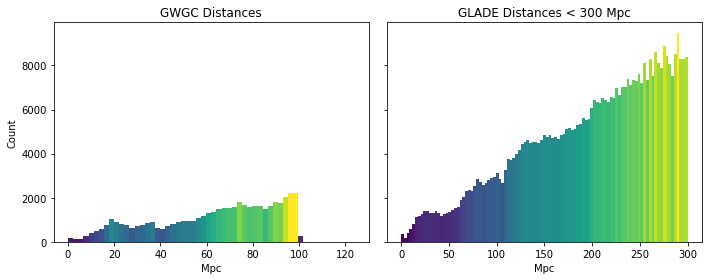

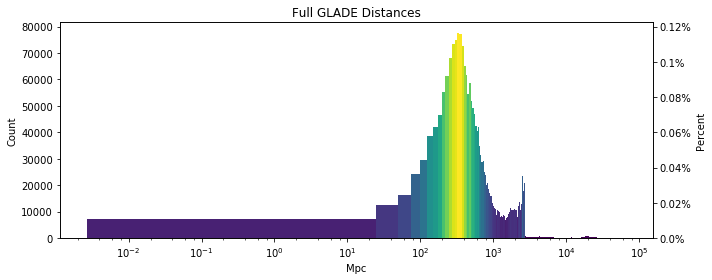

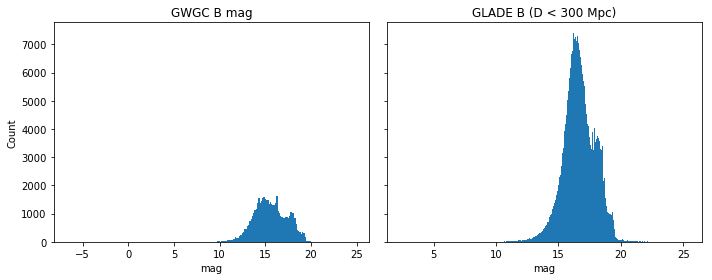

In [8]:
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)
    return s + '%'

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
N1, bins1, patches1 = axs[0].hist(gwgc_dist, bins='auto')
fracs1 = N1.astype(float) / N1.max()
norm1 = colors.Normalize(fracs1.min(), fracs1.max())
for thisfrac, thispatch in zip(fracs1, patches1):
    color = plt.cm.viridis(norm1(thisfrac))
    thispatch.set_facecolor(color)
axs[0].set_title("GWGC Distances")
axs[0].set_xlabel("Mpc")
axs[0].set_ylabel("Count")

N2, bins2, patches2 = axs[1].hist(glade_dist_less300, bins='auto')
fracs2 = N2.astype(float) / N2.max()
norm2 = colors.Normalize(fracs2.min(), fracs2.max())
for thisfrac, thispatch in zip(fracs2, patches2):
    color = plt.cm.viridis(norm2(thisfrac))
    thispatch.set_facecolor(color)
axs[1].set_title("GLADE Distances < 300 Mpc")
axs[1].set_xlabel("Mpc")

plt.tight_layout()
plt.show()

# 

fig, ax1 = plt.subplots(figsize=(10, 4)) #, sharex=True 1, 1, 
N3, bins3, patches3 = ax1.hist(glade_dist, bins='auto')
ax1.set_ylabel("Count")
ax1.set_xscale("log")
ax1.set_xlabel("Mpc")
ax1.set_title("Full GLADE Distances")

ax2 = ax1.twinx()
N4, bins4, patches4 = ax2.hist(glade_dist, bins=bins3, normed=True)

# We'll color code by height, but you could use any scalar
fracs4 = N4.astype(float) / N4.max()
# we need to normalize the data to 0..1 for the full range of the colormap
norm4 = colors.Normalize(fracs4.min(), fracs4.max())
# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs4, patches4):
    color = plt.cm.viridis(norm4(thisfrac))
    thispatch.set_facecolor(color)

formatter = FuncFormatter(to_percent)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylabel("Percent")
ax2.set_xscale("log")

plt.tight_layout()
plt.show()

#

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True) #  , tight_layout=True

# We can set the number of bins with the `bins` kwarg
axs[0].hist(gwgc_B, bins='auto')

axs[0].set_title("GWGC B mag")
axs[0].set_xlabel("mag")
axs[0].set_ylabel("Count")

axs[1].hist(glade_B_less300, bins='auto')
axs[1].set_title("GLADE B (D < 300 Mpc)")
axs[1].set_xlabel("mag")

plt.tight_layout()
plt.show()

the filters we need are: FnumberLP, and wide ones (W)

We are looking for more hst better

filter by distance, 50 mparsecs

pull back all rows where d<20 still takes a while

query GWDC first, bc these are closer and mostly complete

Figure out code first and then apply to Glade

dust filters to get rid of ones in plane of galaxy.




distance
irsa  ---  Vband, get dust for all. n=100 at a time

thatcher, find geo coordinates at 90 subtract 90 from dec to get hemisphere they can seee. We can look up pointing units on telescope

<0.5 dust in V band

THEN look for hst imaging and stuff that 

ned query, of the galaxies <40 Mpc to flag ones head on to us 90 or 0

build a table for thatcher

newest version of astroquery....

part of ez access github 